## Perceptron
A simple perceptron to understand the weights' updates

In [1]:
import numpy as np

# Define the perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = np.array([0.5, -0.5])
        self.bias = np.array([-0.5])

    def fit(self, X, y):
        n_samples, n_features = X.shape

        for i in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                
                self.weights += update * x_i
                self.bias += update
                
#                 print(f"Iterations {i}: linear_output {linear_output}, label {y[idx]}, prediction {y_predicted}")
            print(f"Epoch {i+1}: Output {[perceptron.predict(x) for x in X]}")

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

# Input data for AND logic gate
X = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = np.array([0.0, 0.0, 0.0, 1.0])  # Expected outputs for AND

# Create a perceptron instance and train it
perceptron = Perceptron(learning_rate=0.1, n_iter=10)
perceptron.fit(X, y)

# Test the perceptron on training data
predictions = [perceptron.predict(x) for x in X]
print(predictions)  # Output: [0, 0, 0, 1]

Epoch 1: Output [0, 0, 1, 0]
Epoch 2: Output [0, 0, 1, 0]
Epoch 3: Output [0, 0, 1, 0]
Epoch 4: Output [0, 0, 1, 0]
Epoch 5: Output [0, 0, 1, 1]
Epoch 6: Output [0, 0, 1, 1]
Epoch 7: Output [0, 0, 1, 1]
Epoch 8: Output [0, 0, 0, 1]
Epoch 9: Output [0, 0, 0, 1]
Epoch 10: Output [0, 0, 0, 1]
[0, 0, 0, 1]


## Adaline
A simple Adaptive Linear Neuron to play and understand how it works

Predictions: [1 1 1]


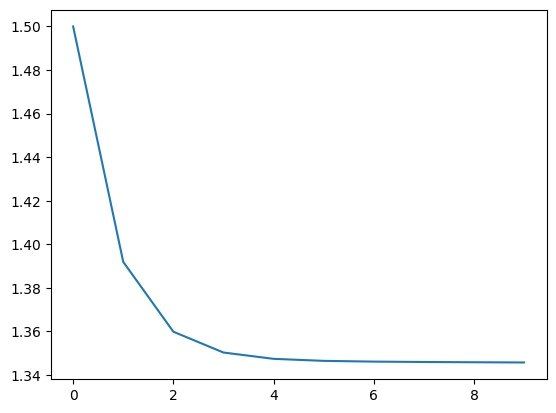

In [2]:
import numpy as np

class Adaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.cost_ = []
        
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Example usage
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([1, -1, 1])
adaline = Adaline(learning_rate=0.01, epochs=10)
adaline.fit(X, y)
predictions = adaline.predict(X)

print("Predictions:", predictions)

import matplotlib.pyplot as plt

plt.plot(adaline.cost_)
plt.show()

## Logistic regression
Play, understand and learn

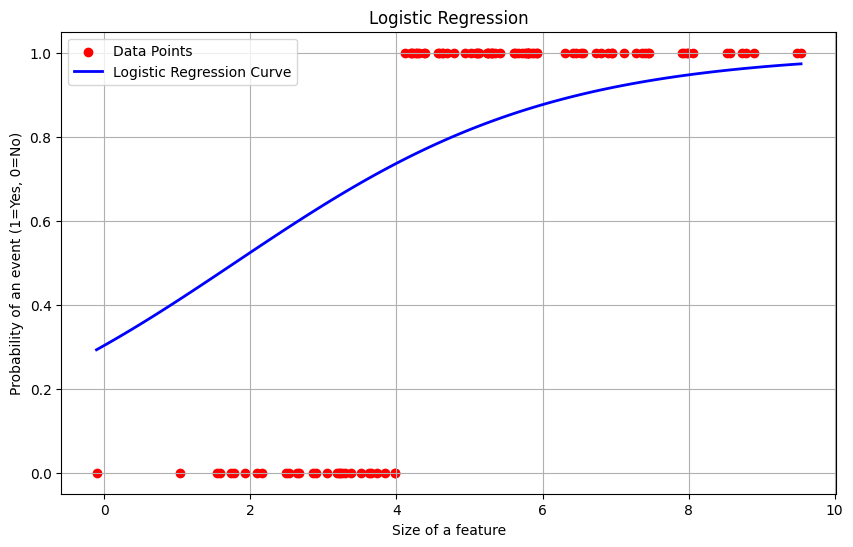

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - Y))
            db = (1 / num_samples) * np.sum(y_predicted - Y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

# Generate a simple dataset
np.random.seed(0)
num_samples = 100
X = np.random.normal(5, 2, num_samples).reshape(-1, 1)
Y = (X > 4).astype(int).flatten()

# Create and fit the model
model = LogisticRegression(learning_rate=0.1, num_iterations=100)
model.fit(X, Y)

# Predict probabilities for plotting
x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)
linear_model_values = np.dot(x_values, model.weights) + model.bias
logistic_curve = sigmoid(linear_model_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='red', label='Data Points')
plt.plot(x_values, logistic_curve, color='blue', linewidth=2, label='Logistic Regression Curve')
plt.title('Logistic Regression')
plt.xlabel('Size of a feature')
plt.ylabel('Probability of an event (1=Yes, 0=No)')
plt.legend()
plt.grid()
plt.show()


## What is the difference between a Perceptron, Adaline, and neural network model?
Play more with perceptron, adalina and MLP(not covered in the lecture, but easy to grap the idea)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


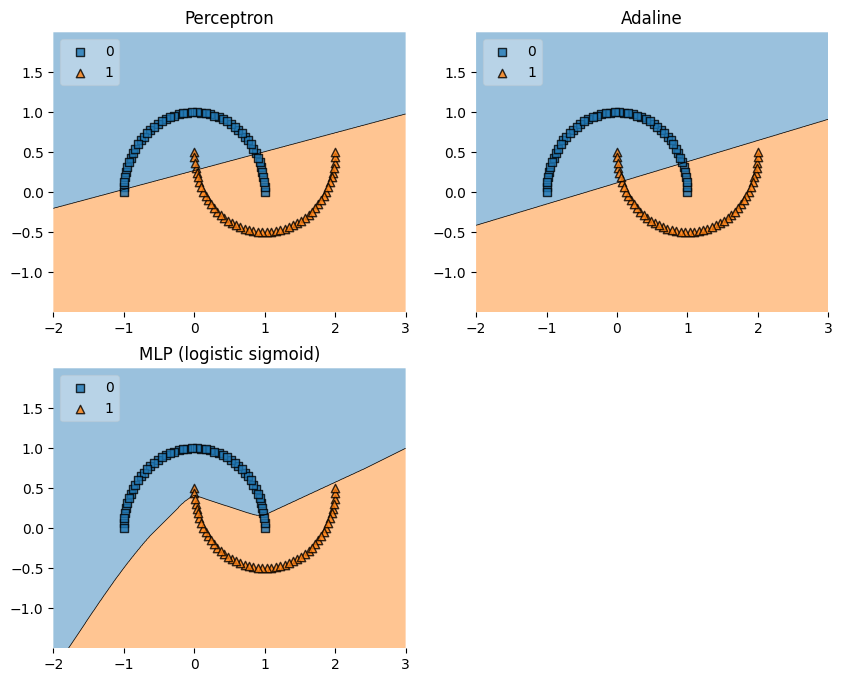

In [4]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Perceptron
from mlxtend.classifier import Adaline
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)
X, y = make_moons(n_samples=100, random_state=123)
fig = plt.figure(figsize=(10,8))

ppn = Perceptron(epochs=50, eta=0.05, random_seed=0)
ppn.fit(X, y)
ada = Adaline(epochs=50, eta=0.05, random_seed=0)
ada.fit(X, y)

# MLP from sklearn
mlp = MLPClassifier(hidden_layer_sizes=(150,),
                    max_iter=500,
                    alpha=0.001,
                    solver='adam',
                    random_state=0)

mlp.fit(X, y)


for clf, lab, grd in zip([ppn, ada, mlp],
                         ['Perceptron', 'Adaline', 'MLP (logistic sigmoid)'],
                         itertools.product([0, 1], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()